In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
import keras.backend as K

Using TensorFlow backend.


In [3]:
train_da, test_da = mnist.load_data()
x_train, y_train = train_da 
x_test, y_test = test_da

11493376/11490434 [==============================] - 15s 1us/step


5 0 4 1
9 2 1 3
1 4 3 5
3 6 1 7


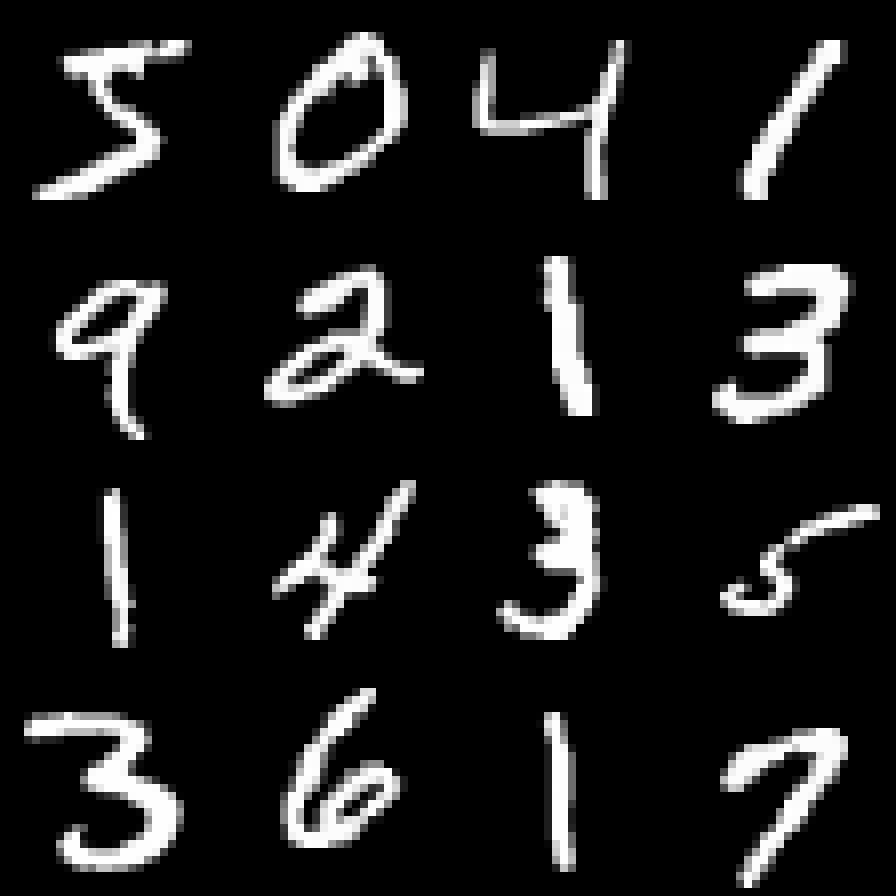

In [4]:
from IPython.display import Image
from PIL import Image
import numpy as np
a = np.concatenate(x_train[0:4], axis=1)
print(" ".join([str(x) for x in y_train[0:4]]))
for i in range(3):
    a = np.concatenate([a, np.concatenate(x_train[4+i*4:8+i*4], axis=1)], axis=0)
    print(" ".join([str(x) for x in y_train[4+i*4:8+i*4]]))
img = Image.fromarray(a, 'L')
img.resize((896, 896), Image.NEAREST)

In [5]:
data_format = K.image_data_format()
rows, cols = 28, 28
num_classes = 10
train_size = x_train.shape[0]
test_size = x_test.shape[0]

if data_format == 'channels_first':
    x_train = x_train.reshape(train_size, 1, rows, cols)
    x_test = x_test.reshape(test_size, 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(train_size, rows, cols, 1)
    x_test = x_test.reshape(test_size, rows, cols, 1)
    input_shape = (rows, cols, 1)
    
# norm data to float in range 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to one hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
x_train = x_train[:128]
y_train = y_train[:128]

In [7]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [9]:
batch_size = 128
epochs = 20

In [10]:
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Instructions for updating:
Use tf.cast instead.
Train on 128 samples, validate on 10000 samples
Epoch 1/20
128/128 [==============================] - 0s 2ms/step - loss: 2.3415 - acc: 0.0781 - val_loss: 2.3218 - val_acc: 0.1424
Epoch 2/20
128/128 [==============================] - 0s 467us/step - loss: 2.2717 - acc: 0.1016 - val_loss: 2.2803 - val_acc: 0.1763
Epoch 3/20
128/128 [==============================] - 0s 561us/step - loss: 2.2046 - acc: 0.1641 - val_loss: 2.2409 - val_acc: 0.2048
Epoch 4/20
128/128 [==============================] - 0s 502us/step - loss: 2.1402 - acc: 0.2422 - val_loss: 2.2057 - val_acc: 0.2304
Epoch 5/20
128/128 [==============================] - 0s 530us/step - loss: 2.0821 - acc: 0.3359 - val_loss: 2.1700 - val_acc: 0.2551
Epoch 6/20
128/128 [==============================] - 0s 443us/step - loss: 2.0226 - acc: 0.3828 - val_loss: 2.1360 - val_acc: 0.2765
Epoch 7/20
128/128 [==============================] - 0s 842us/step - loss: 1.9653 - acc: 0.3984 - val

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.7429419593811035
Test accuracy: 0.5206


In [12]:
from pandas import DataFrame
df_loss = DataFrame(data={
    'Epoche': history.epoch * 2,
    'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
    'Loss': history.history['loss'] + history.history['val_loss']
})
df_accuracy = DataFrame(data={
    'Epoche': history.epoch * 2,
    'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
    'Accuracy': history.history['acc'] + history.history['val_acc']
})
print(df_loss)
print(df_accuracy)

    Epoche                  Legende      Loss
0        0  Loss auf Trainingsdaten  2.341513
1        1  Loss auf Trainingsdaten  2.271696
2        2  Loss auf Trainingsdaten  2.204638
3        3  Loss auf Trainingsdaten  2.140249
4        4  Loss auf Trainingsdaten  2.082136
5        5  Loss auf Trainingsdaten  2.022570
6        6  Loss auf Trainingsdaten  1.965268
7        7  Loss auf Trainingsdaten  1.910072
8        8  Loss auf Trainingsdaten  1.857559
9        9  Loss auf Trainingsdaten  1.806075
10      10  Loss auf Trainingsdaten  1.756246
11      11  Loss auf Trainingsdaten  1.708020
12      12  Loss auf Trainingsdaten  1.661156
13      13  Loss auf Trainingsdaten  1.615646
14      14  Loss auf Trainingsdaten  1.571430
15      15  Loss auf Trainingsdaten  1.528195
16      16  Loss auf Trainingsdaten  1.486469
17      17  Loss auf Trainingsdaten  1.445954
18      18  Loss auf Trainingsdaten  1.406279
19      19  Loss auf Trainingsdaten  1.367797
20       0       Loss auf Testdate

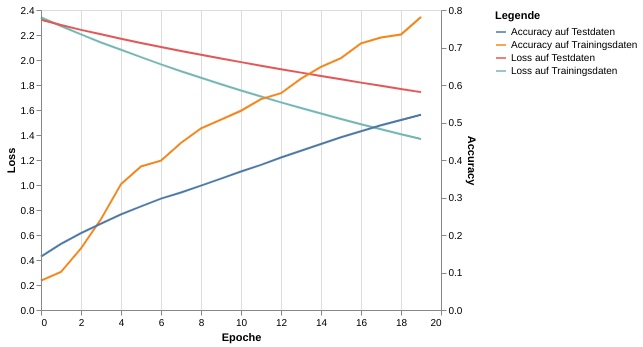

In [13]:
import altair as alt
alt.renderers.enable('notebook')

chart_loss = alt.Chart(df_loss).mark_line().encode(
    x='Epoche', y='Loss', color='Legende')
chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
    x='Epoche', y='Accuracy', color='Legende')
chart = chart_loss + chart_accuracy
chart.resolve_scale(y='independent')

In [14]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 128 samples, validate on 10000 samples
Epoch 1/20
128/128 [==============================] - 0s 2ms/step - loss: 2.3705 - acc: 0.1016 - val_loss: 2.2726 - val_acc: 0.1180
Epoch 2/20
128/128 [==============================] - 0s 801us/step - loss: 2.1557 - acc: 0.1719 - val_loss: 2.1745 - val_acc: 0.2117
Epoch 3/20
128/128 [==============================] - 0s 759us/step - loss: 1.9903 - acc: 0.3672 - val_loss: 2.0706 - val_acc: 0.3205
Epoch 4/20
128/128 [==============================] - 0s 1ms/step - loss: 1.8157 - acc: 0.6328 - val_loss: 1.9800 - val_acc: 0.3971
Epoch 5/20
128/128 [==============================] - 0s 1ms/step - loss: 1.6651 - acc: 0.7031 - val_loss: 1.8881 - val_acc: 0.4717
Epoch 6/20
128/128 [==============================] - 0s 1ms/step - loss: 1.5148 - acc: 0.7656 - val_loss: 1.7997 - val_acc: 0.5289
Epoch 7/20
128/128 [==============================] - 0s 994us/step - loss: 1.3737 - acc: 0.8359 - val_loss: 1.7144 - val_acc: 0.5724
Epoch 8/20
128/128 [==

In [16]:
def evaluate(model, history):
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    df_loss = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
        'Loss': history.history['loss'] + history.history['val_loss']
    })
    df_accuracy = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
        'Accuracy': history.history['acc'] + history.history['val_acc']
    })
    chart_loss = alt.Chart(df_loss).mark_line().encode(
        x='Epoche', y='Loss', color='Legende')
    chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
        x='Epoche', y='Accuracy', color='Legende')
    chart = chart_loss + chart_accuracy
    return chart.resolve_scale(y='independent')

Test loss: 1.0683694172859193
Test accuracy: 0.6899


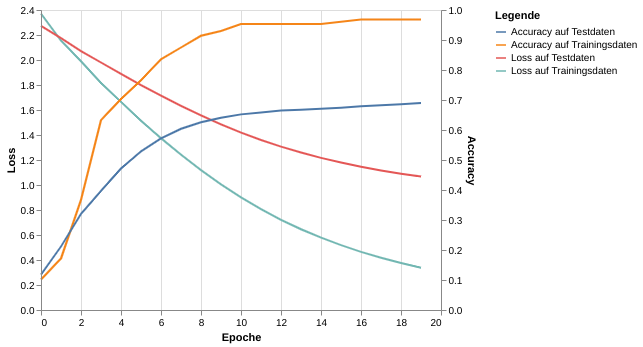

In [17]:
evaluate(model, history)

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_size = x_train.shape[0]
test_size = x_test.shape[0]

data_format = K.image_data_format()
if data_format == 'channels_first':
    x_train = x_train.reshape(train_size, 1, rows, cols)
    x_test = x_test.reshape(test_size, 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(train_size, rows, cols, 1)
    x_test = x_test.reshape(test_size, rows, cols, 1)
    input_shape = (rows, cols, 1)
    
# norm data to float in range 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to one hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [19]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
batch_size = 128
epochs = 12

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 2s 40us/step - loss: 0.5214 - acc: 0.8462 - val_loss: 0.2235 - val_acc: 0.9371
Epoch 2/12
60000/60000 [==============================] - 2s 38us/step - loss: 0.2676 - acc: 0.9228 - val_loss: 0.1638 - val_acc: 0.9536
Epoch 3/12
60000/60000 [==============================] - 2s 37us/step - loss: 0.2174 - acc: 0.9368 - val_loss: 0.1367 - val_acc: 0.9592
Epoch 4/12
60000/60000 [==============================] - 2s 38us/step - loss: 0.1874 - acc: 0.9458 - val_loss: 0.1194 - val_acc: 0.9650
Epoch 5/12
60000/60000 [==============================] - 2s 39us/step - loss: 0.1685 - acc: 0.9511 - val_loss: 0.1081 - val_acc: 0.9680
Epoch 6/12
60000/60000 [==============================] - 2s 39us/step - loss: 0.1552 - acc: 0.9542 - val_loss: 0.0988 - val_acc: 0.9714
Epoch 7/12
60000/60000 [==============================] - 2s 38us/step - loss: 0.1428 - acc: 0.9578 - val_loss: 0.0943 - val_acc

Test loss: 0.07946137124816888
Test accuracy: 0.9773


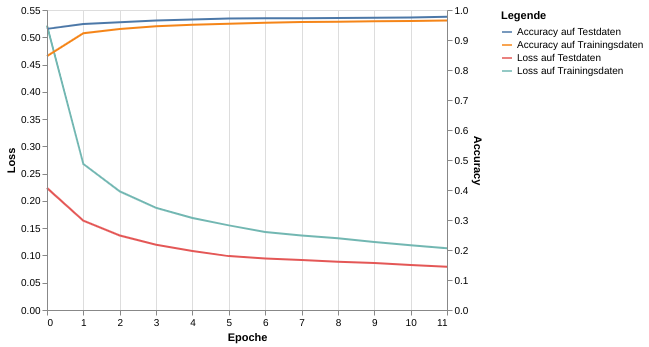

In [21]:
evaluate(model, history)

In [22]:
model = Sequential()
model.add(Conv2D(
             32, kernel_size=(3, 3), 
             activation='relu', 
             input_shape=input_shape))
model.add(Conv2D(
             64, kernel_size=(3, 3), 
             activation='relu'))
model.add(MaxPooling2D(
             pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

In [23]:
batch_size = 128
epochs = 12

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 155s 3ms/step - loss: 0.2464 - acc: 0.9242 - val_loss: 0.0569 - val_acc: 0.9809
Epoch 2/12
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0837 - acc: 0.9749 - val_loss: 0.0390 - val_acc: 0.9866
Epoch 3/12
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0634 - acc: 0.9808 - val_loss: 0.0329 - val_acc: 0.9891
Epoch 4/12
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0506 - acc: 0.9842 - val_loss: 0.0295 - val_acc: 0.9905
Epoch 5/12
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0438 - acc: 0.9861 - val_loss: 0.0295 - val_acc: 0.9910
Epoch 6/12
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0368 - acc: 0.9882 - val_loss: 0.0273 - val_acc: 0.9913
Epoch 7/12
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0334 - acc: 0.9892 - val_loss: 0.0253 - 

Test loss: 0.0273025590507802
Test accuracy: 0.9919


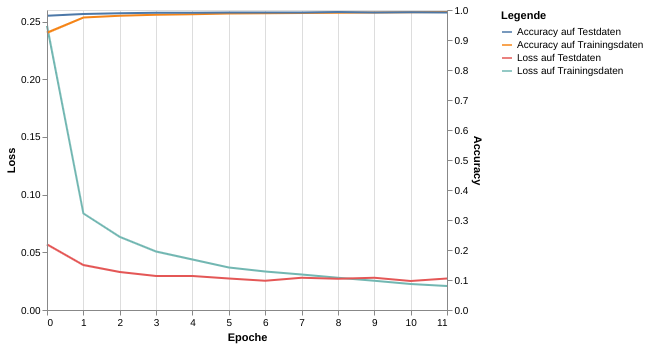

In [24]:
evaluate(model, history)